In [12]:
import pandas as pd
import seaborn as sns
from utils import shuffle, train_test_split, min_max_normalize, label_encoder, confusion_matrix, accuracy 
from neighbors import KNNClassifier

In [13]:
iris = pd.read_csv('./data/Iris.csv')

In [14]:
iris['Species'], labels = label_encoder(iris['Species'].values.tolist())

In [15]:
train, test = train_test_split(iris, train_size=0.7)

x_train = train.drop('Species', axis=1)
x_test = test.drop('Species', axis=1)

y_train = train['Species']
y_test = test['Species']


# if use the entire dataset, to generate the min and max values, will be 'cheating on the game'. 
# You need to normalize test using train min and max. This is also valid for new entries in production
x_train, minmax = min_max_normalize(x_train)
x_test, _ = min_max_normalize(x_test)

In [16]:
x_train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,0.509684,0.433333,0.448810,0.470218,0.465476
std,0.309929,0.240920,0.191487,0.315220,0.340442
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208054,0.222222,0.333333,0.084746,0.041667
50%,0.536913,0.416667,0.416667,0.576271,0.500000
75%,0.771812,0.583333,0.583333,0.711864,0.791667
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
knn = KNNClassifier(k=5)
knn.fit(x_train, y_train)

In [18]:
y_pred = knn.predict(x_test)

acc 95.56


<AxesSubplot:>

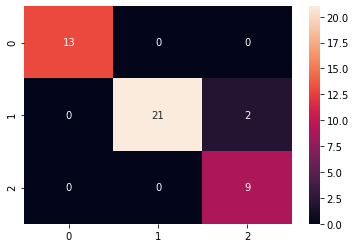

In [32]:
acc = accuracy(y_test, y_pred) * 100
conf = confusion_matrix(y_test, y_pred)
print('acc %.2f' % acc)
sns.heatmap(conf, annot=True)